<a href="https://colab.research.google.com/github/raphdavid/ASA_Datafest_2020_Best_Use_Of_ML/blob/main/datafest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis


In [ ]:
us19 = pd.read_csv('/content/drive/MyDrive/Datafest2021/US/nmurx_us_19Q1.csv')
#us19 = pd.read_csv('/content/drive/MyDrive/Datafest2021/US/nmurx_us_19Q1.csv')

In [ ]:
us19

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,DEM_LIMIT,TOB_LIFE,ORDER_PAINREL,ORDER_SED,ORDER_STIM,ORDER_THC,ORDER_PAINREL_API_BHYD,ORDER_PAINREL_API_BUP,ORDER_PAINREL_API_COD,ORDER_PAINREL_API_DIHY,ORDER_PAINREL_API_ELU,ORDER_PAINREL_API_FENT,ORDER_PAINREL_API_GAB,ORDER_PAINREL_API_HYD,ORDER_PAINREL_API_HYDM,ORDER_PAINREL_API_KTM,ORDER_PAINREL_API_METH,ORDER_PAINREL_API_MORPH,ORDER_PAINREL_API_OXY,ORDER_PAINREL_API_OXYM,ORDER_PAINREL_API_PREG,ORDER_PAINREL_API_SUF,ORDER_PAINREL_API_TAP,ORDER_PAINREL_API_TRAM,BHYD_USE,BUP_USE,COD_USE,DIHY_USE,ELU_USE,FENT_USE,...,THC_NMUWK,OP_USE,OP_USEYR,OP_NMU,OP_NMUYR,OP_NMUNTY,OP_NMUMNTH,OP_NMUWK,GABA_USE,GABA_USEYR,GABA_NMU,GABA_NMUYR,GABA_NMUNTY,GABA_NMUMNTH,GABA_NMUWK,BHYD_NMUNTY,BUP_NMUNTY,COD_NMUNTY,DIHY_NMUNTY,FENT_NMUNTY,HYD_NMUNTY,HYDM_NMUNTY,METH_NMUNTY,MORPH_NMUNTY,OXY_NMUNTY,OXYM_NMUNTY,SUF_NMUNTY,TAP_NMUNTY,TRAM_NMUNTY,ILLXCAN_USE,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
0,2019-03-27 14:16:02,3,1,2,51,782,3,4,3,2,0,1,3,4,1,2,1,6,13,15,4,17,2,8,16,12,18,11,14,9,7,3,5,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,7074.136133
1,2019-03-24 12:42:54,3,1,2,67,604,2,1,1,2,1,3,3,2,4,1,13,11,1,15,2,3,5,10,6,8,9,17,7,12,18,16,4,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4069.460791
2,2019-03-21 08:56:26,3,1,2,71,339,3,4,2,4,0,3,1,4,2,3,1,16,7,11,3,15,14,17,4,18,2,12,10,8,6,13,9,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7554.618118
3,2019-03-24 14:38:49,3,1,2,68,801,4,2,1,4,0,1,2,4,1,3,16,14,7,6,10,15,18,12,11,13,5,1,3,4,9,2,17,8,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4178.061514
4,2019-03-24 12:26:53,3,1,2,69,612,2,2,2,4,0,3,2,3,4,1,9,17,2,15,6,1,4,3,7,11,18,8,5,12,10,13,16,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7033.819350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29868,2019-04-04 06:46:23,3,1,2,49,87,1,5,2,4,0,3,3,4,1,2,6,2,15,7,14,8,18,13,4,11,9,12,10,1,5,17,3,16,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10825.523050
29869,2019-03-29 09:15:03,3,1,2,51,650,2,1,2,2,1,3,2,3,1,4,12,13,14,6,15,10,2,16,3,11,1,17,8,7,4,9,18,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6714.441082
29870,2019-04-03 10:55:57,3,1,2,22,282,3,3,2,5,0,3,1,2,4,3,1,8,13,6,5,18,14,9,4,12,11,3,16,15,2,7,17,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25819.903736
29871,2019-03-28 15:58:18,3,1,2,43,945,4,5,3,4,0,3,4,3,2,1,15,12,10,13,4,16,8,17,6,11,7,18,9,2,5,3,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11522.377412


In [ ]:
us19['OTH_RX_DRUG_USE'].value_counts()

1    27705
0     2168
Name: OTH_RX_DRUG_USE, dtype: int64

OTH_RX_DRUG_USE    0     1  percentage users
DEM_INCOME                                  
1                381  4968          0.076691
2                569  7472          0.076151
3                458  6116          0.074886
4                373  3994          0.093390
5                387  5155          0.075073


<BarContainer object of 5 artists>

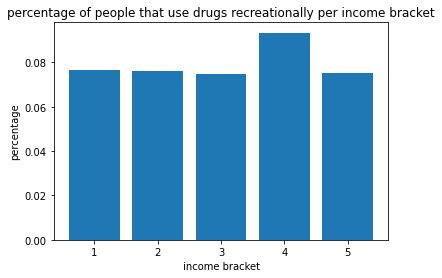

In [ ]:
wealthvDrugs = pd.crosstab(us19.DEM_INCOME,us19.OTH_RX_DRUG_USE)
wealthvDrugs['percentage users'] = wealthvDrugs[0]/wealthvDrugs[1]
print(wealthvDrugs)
y =wealthvDrugs['percentage users']
x = wealthvDrugs.index
plt.ylabel('percentage')
plt.xlabel('income bracket')
plt.title('percentage of people that use drugs recreationally per income bracket')

plt.bar(x,y)

OTH_RX_DRUG_USE    0     1  percentage users
DEM_INCOME                                  
1                381  4968          0.076691
2                569  7472          0.076151
3                458  6116          0.074886
4                373  3994          0.093390
5                387  5155          0.075073


<BarContainer object of 5 artists>

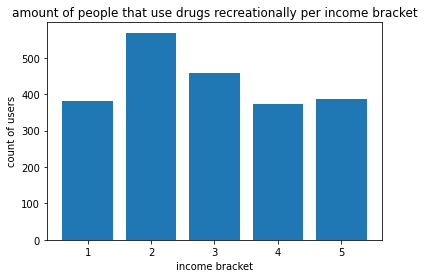

In [ ]:
print(wealthvDrugs)
y =wealthvDrugs[0]
x = wealthvDrugs.index
plt.ylabel('count of users')
plt.xlabel('income bracket')
plt.title('amount of people that use drugs recreationally per income bracket')

plt.bar(x,y)

In [ ]:
#drug users per age
#1 indicates i have not used drugs in a way not prescribed by my provider
ageCompare = pd.crosstab(us19.DEM_AGE,us19.OTH_RX_DRUG_USE)
drugUsersPerAge = ageCompare[0]
nonDrugUsersPerAge = ageCompare[1]
drugUsersPerAge = pd.DataFrame(drugUsersPerAge)


In [ ]:
x =drugUsersPerAge.index.tolist()
y =drugUsersPerAge[0].values.tolist()


<BarContainer object of 82 artists>

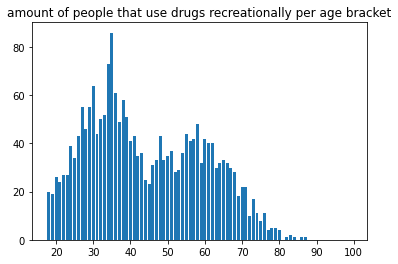

In [ ]:
plt.title('amount of people that use drugs recreationally per age bracket')
plt.bar(x,y)

<BarContainer object of 82 artists>

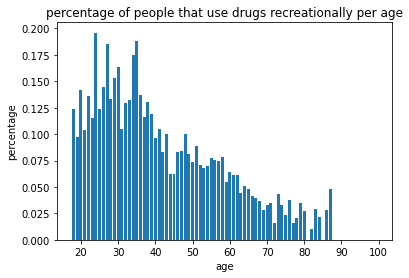

In [ ]:
#get percentage
ageCompare
ageCompare['percentage users'] = ageCompare[0]/ageCompare[1]
ageCompare
y =ageCompare['percentage users']
x = ageCompare.index
plt.ylabel('percentage')
plt.xlabel('age')
plt.title('percentage of people that use drugs recreationally per age')

plt.bar(x,y)

(array([2235., 3447., 3877., 3470., 4343., 5590., 4956., 1658.,  263.,
          34.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <a list of 10 Patch objects>)

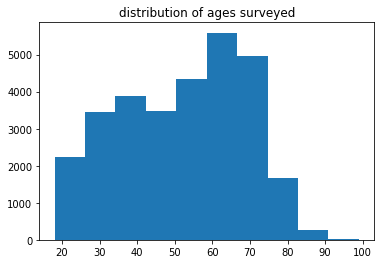

In [ ]:
              plt.title('distribution of ages surveyed')
plt.hist(us19['DEM_AGE'])

In [ ]:
ageGroup = us19.groupby(us19['DEM_AGE']).count()
ageGroupCounts = (ageGroup['OTH_RX_DRUG_USE'])
ageGroupCounts

DEM_AGE
18    182
19    214
20    209
21    256
22    225
     ... 
95      2
96      3
97      1
98      2
99      1
Name: OTH_RX_DRUG_USE, Length: 82, dtype: int64

In [ ]:
#drug use per age
ageCompare

OTH_RX_DRUG_USE,0,1,percentage users
DEM_AGE,,,
18,20,162,0.123457
19,19,195,0.097436
20,26,183,0.142077
21,24,232,0.103448
22,27,198,0.136364
...,...,...,...
95,0,2,0.000000
96,0,3,0.000000
97,0,1,0.000000


In [ ]:
ones = ageCompare.drop(columns={0})
zeros = ageCompare.drop(columns={1})

Text(0.5, 0, 'age')

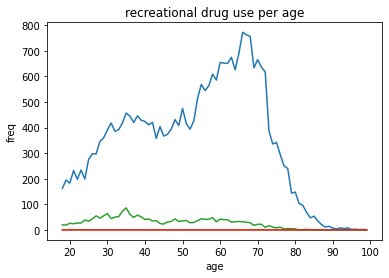

In [ ]:
plt.plot(ones)
plt.plot(zeros)
plt.title('recreational drug use per age')
plt.ylabel('freq')
plt.xlabel('age')

29963

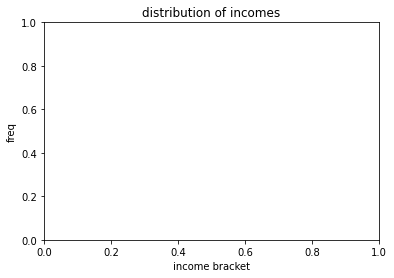

In [ ]:
#income distribution
plt.ylabel('freq')
plt.xlabel('income bracket')
plt.title('distribution of incomes')
income = us19['DEM_INCOME']
a = income.value_counts()
x = [1,2,3,4,5]
y = [5439,8041,6574,4367,5542]
sum(y)
#plt.bar(x,y)

<BarContainer object of 5 artists>

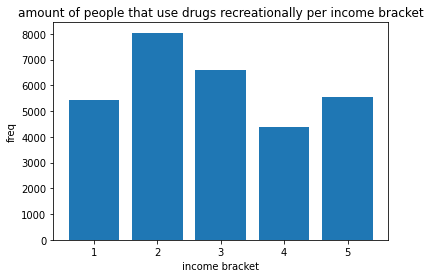

In [ ]:
#amount of people that use drugs recreationally per inome bracket
plt.ylabel('freq')
plt.xlabel('income bracket')
plt.title('amount of people that use drugs recreationally per income bracket')

plt.bar(x,y)

# NLP


In [ ]:
textPerAge = pd.crosstab(us19.DEM_AGE,us19.OTH_RX_DRUG_USE_SPFY)
textPerAge

OTH_RX_DRUG_USE_SPFY,0,1,3,5,900 mg motrin,A couple of times I have had to use my inhaler closer than every 4 hours. My COPD bothers,A couple of years ago I took 2 that my brother had given me after I had pulled a muscle in,A friend gave me one,A friend shares her xanax with me occasionally.,A muscle relaxant but I don't know the name. Only used once to see if it would relieve ba,A percocet pill,A sleeping pill,ABSTRACT,ADVIL,AGREE,AMOXICILLIN,Abilify,About 10 years ago I was doing drugs very heavily but I went to rehab and changed my life,Absolutely not! I don't like taking medication and taking it incorrectly is out of the qu,Abused it by crushing & insufflating and taking greater amounts than prescribed.,Acid Reflux medicine,Acid reflux,Adapacks (weight loss meds),Adderal,"Adderal, Ritalin",Adderall,Adderall in college for studying,"Adderall, Xanax, cannibis","Adderall, not mine, snorted. Hydrocodone, used after needed or gave to someone who NEEDED.",AdderallVicodin,"Adderol to finish assignments in college, occasionally. Not habitually",Addiral,Additional synthroid,Aderol,Aderol on someone else’s script,Adhd,Adipex,Adipex - ten years ago I occasionally crushed and chewed the medication to get a rush of e,Advair,Advil,...,very nice,vicoden oxycodone adderal,vicodin,"vikodin, when i had wisdom teeth out. i went through the script faster than i should of.",vitamin D,"warfarin, different amounts due to running out of prescribed dose",weed,well,wellbutrin,"when my adderol didn't work like I thought it should, I crushed and snorted it","with out script,someone else's script and for a buzz",with perscription for back pain. Several months,with someone else's prescription,without prescription,xanax,xanaxmedical marijuana gummies,xanaz,xdysiggasuifgsjtu7vgh4huigtfe789tye4st78gfudsgsduigtyrugteruigtweut,yeah I have,yes,yes - took a muscle relaxant prescribed for a friend but i dont know the name,yes 35 years ago,yes I used it all night long and I don't plan on stopping.,yes a pill for veridgo,yes cut it in quarters,yes i have used prescripted acne medication,yes propane gas,yes without prescription someone elses to take awake pain and help to sleep,"yes, many times in the past","yes, my dronabinal because my chemo got too intense for me at one point so I had to take o","yes, used someone else's prescription","yes, used with it",yes. I have used my mother in laws norco from time to time to treat pain.,yes. used someone's prescription for Percocet a couple times when I needed a pain reliever,yjhgggggggggj,you used it without a prescription,zanax used someone elses prescription,zoloft,zoloft. used two pills when I usually take 1 and a half. have tried this one or two times,Have on occasion taken naproxen with my Cymbalta though cautioned not to; I have also tak
DEM_AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
userText = textPerAge.columns.to_list()
userText

['0',
 '1',
 '3',
 '5',
 '900 mg motrin\xa0',
 'A couple of times I have had to use my inhaler closer than every 4 hours.  My COPD bothers',
 'A couple of years ago I took 2 that my brother had given me after I had pulled a muscle in',
 'A friend gave me one',
 'A friend shares her xanax with me occasionally.',
 "A muscle relaxant but I don't know the name.  Only used once to see if it would relieve ba",
 'A percocet pill',
 'A sleeping pill',
 'ABSTRACT',
 'ADVIL',
 'AGREE',
 'AMOXICILLIN',
 'Abilify',
 'About 10 years ago I was doing drugs very heavily but I went to rehab and changed my life',
 "Absolutely not!  I don't like taking medication and taking it incorrectly is out of the qu",
 'Abused it by crushing & insufflating and taking greater amounts than prescribed.',
 'Acid Reflux medicine',
 'Acid reflux',
 'Adapacks (weight loss meds)',
 'Adderal',
 'Adderal, Ritalin',
 'Adderall',
 'Adderall in college for studying',
 'Adderall, Xanax, cannibis',
 'Adderall, not mine, snorted. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(userText)

In [ ]:
print(vectorizer.get_feature_names())
print(X.toarray())


['10', '10mg', '12', '1200mg', '13mm', '14', '15', '16', '1980', '1989', '1990', '20', '2001', '2005', '2008', '25', '2x', '30', '32', '325', '35', '3mg', '3s', '3xs', '40', '40mg', '46', '50mg', '5mg', '600', '62', '800', '800mg', '900', 'abilify', 'abilit', 'able', 'about', 'above', 'absolutely', 'abstract', 'abuse', 'abused', 'abusing', 'accident', 'acet', 'acetaminofen', 'acetaminophen', 'ache', 'aches', 'acid', 'acne', 'acquired', 'actively', 'actosheneric', 'actually', 'acyclovir', 'adalat', 'adapacks', 'add', 'added', 'adderal', 'adderall', 'adderallvicodin', 'adderol', 'adderrall', 'addic', 'addict', 'addicted', 'addiction', 'addictive', 'addiral', 'additional', 'addreal', 'aderall', 'aderol', 'adhd', 'adipex', 'adivain', 'adults', 'advair', 'advance', 'advice', 'advil', 'advised', 'af', 'affect', 'afford', 'afloqualone', 'aft', 'afte', 'after', 'afternoon', 'again', 'ago', 'agree', 'aholic', 'aid', 'aids', 'ailment', 'air', 'albuterol', 'alcohol', 'alcoholic', 'alendronate', '

In [ ]:
#Bag of Words model
BOW = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
BOW.loc['Total']= BOW.sum()
sortedBOW = BOW.iloc[:,np.argsort(-BOW.loc['Total'])].fillna(0)
sortedBOW


,used,it,for,to,prescription,and,the,have,my,pain,was,someone,than,prescribed,in,else,of,more,took,not,when,me,greater,without,with,yes,had,that,from,taken,or,amounts,use,once,take,one,because,pills,on,an,...,jiohugytre,jhghjgjhg,jhghgjhg,kepra,jgvhkbjn,james,ive,iv,iuyuiy,appt,issued,ar,ironibuprofen,involved,jarred,oxicodone,ketomin,kid,lasting,antispasmodic,las,lamactal,label,la,kratom,kolotpin,kolanapin,kftukfukyhukgyu,known,antobotics,knees,app,appetite,klonipin,kkk,kiuy765r4ftghjuytrfghjkiuytfrgthyjuijuygt,killing,appointment,knowledge,zyrtec
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1840,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1841,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
BOW

,10,10mg,12,1200mg,13mm,14,15,16,1980,1989,1990,20,2001,2005,2008,25,2x,30,32,325,35,3mg,3s,3xs,40,40mg,46,50mg,5mg,600,62,800,800mg,900,abilify,abilit,able,about,above,absolutely,...,xanaxmedical,xanaz,xanex,xanexsubxone,xanix,xanto,xanx,xdysiggasuifgsjtu7vgh4huigtfe789tye4st78gfudsgsduigtyrugteruigtweut,xeljanx,xenax,xeralto,xifaxan,xnxx,xxanax,xzyal,ya,yea,yeah,year,years,yeast,yeha,yes,yet,yjhgggggggggj,yo,you,young,younger,your,yrs,zanax,zanex,zanix,zetia,zofran,zoloft,zomig,zyantac,zyrtec
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
BOW['adderall']

0         0
1         0
2         0
3         0
4         0
         ..
1838      0
1839      0
1840      0
1841      0
Total    15
Name: adderall, Length: 1843, dtype: int64

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 4))
X2 = vectorizer2.fit_transform(userText)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['10 325', '10 325 mg', '10 325 mg from', '10 days', '10 days rather', '10 days rather than', '10 days worth', '10 days worth but', '10 my', '10 my mother', '10 my mother had', '10 years', '10 years ago', '10 years ago was', '12 pills', '12 pills had', '12 pills had about', '12 to', '12 to 16', '12 to 16 hours', '1200mg dosed', '13mm look', '13mm look it', '14 days', '14 days recommended', '15 years', '15 years ago', '16 hours', '16 years', '1980 used', '1980 used this', '1980 used this pill', '1989 crushed', '1989 crushed it', '1989 crushed it and', '20 25', '20 my', '20 my friends', '20 my friends shared', '20 yrs', '20 yrs ago', '20 yrs ago had', '2001 had', '2001 had kidney', '2001 had kidney stone', '2005 had', '2005 had back', '2005 had back surgery', '30 per', '30 per mon', '32 years', '32 years ago', '32 years ago took', '325 mg', '325 mg from', '325 mg from my', '35 years', '35 years ago', '3mg plus', '3mg plus stopped', '3mg plus stopped after', '3s in', '3s in the', '3s in t

In [ ]:
#ngram Bag of Words Model
ngramBOW = pd.DataFrame(X2.toarray(),columns=vectorizer2.get_feature_names())
ngramBOW.loc['Total']= ngramBOW.sum()
sortedngramBOW = ngramBOW.iloc[:,np.argsort(-ngramBOW.loc['Total'])].fillna(0)
sortedngramBOW

,someone else,used it,used someone,else prescription,have used,someone else prescription,used someone else,without prescription,greater amounts,than prescribed,more than,in greater,have taken,it for,it was,for the,for pain,was prescribed,used someone else prescription,prescription for,in greater amounts,used it for,used my,more often,prescribed to,that was,it without,it in,of my,used more,used it without,used without,than directed,not prescribed,someone elses,prescribed for,feeling it,when was,ve used,used in,...,ibuprofen 600,hydrocodone in way,husbands prescribed,hydrocodone in,hydrocodone given by,hydracodone used it for,hydracodone used it,hydracodone used,husbands tramadol and hydrocodone,husbands tramadol and,husbands tramadol,hydro from,husbands that was left,husbands that,husbands previously had script,husbands previously had,husbands previously,husbands presctiption,husbands prescribed codeine medication,husbands that was,hydro from someone,hydro from someone else,hydrocodone and,hydrocodone given,hydrocodone for the feeling,hydrocodone for the,hydrocodone for back pain,hydrocodone for back,hydrocodone codeine,hydrocodone before that it,hydrocodone before that,hydrocodone before asking my,hydrocodone before asking,hydrocodone at night to,hydrocodone at night,hydrocodone at,hydrocodone and oxycodone without,hydrocodone and oxycodone,hydrocodone given by someone,zyrtec albuterol
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install geotext

In [ ]:
import string
from nltk.tokenize import word_tokenize 
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
from geotext import GeoText
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess(res):
  #Remove proper nouns that are not place names
  tagged_sentence = nltk.tag.pos_tag(res.split())
 

  #Convert all to lower case
  res = res.lower()

 

  #Remove links
  res = re.sub(r'https?://\S+','',res)

  #Remove punctuations
  punct = string.punctuation[0:11] + string.punctuation[13:]
  translator = str.maketrans('', '', punct)
  res = res.translate(translator)
  
  #Remove stopwords
  stop_words = set(stopwords.words("english"))
  my_stop_words = stop_words.union(set(['cid','in','doi', 'de' ,'pp', 'al','et','cid','eg','also','new','use','within','among','email','well','could','many','would','could','many','three','figure','across','authors','author','publication','university','including','thus','given','crossref','therefore','according']))  
  word_tokens = word_tokenize(res)
  filtered_text = []
  flag=0
  for word in word_tokens:
    #print(word.isalpha(),word)
    if(word not in my_stop_words and len(word)<15 and any(c.isalpha() for c in word)):
      if(word.isalpha()):
        filtered_text.append(word)
      else:
        if(word[-2:]=="th" or word[-2:]=="nd" or word[-1:]=="s" and len(word)<11):
          filtered_text.append(word)
  res = " ".join(filtered_text)

  #Lemmatize words
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(res) 
  # provide context i.e. part-of-speech 
  lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
  res = " ".join(lemmas)

  #Remove string with length 1
  res = res.split()
  res = " ".join([word for word in res if len(word)>3])
  
  return res

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
newCols = [preprocess(i) for i in userText]

In [ ]:
newCols

['',
 '',
 '',
 '',
 'motrin',
 'couple time inhaler closer every hours copd bother',
 'couple years take brother pull muscle',
 'friend give',
 'friend share xanax occasionally',
 'muscle relaxant dont know name relieve',
 'percocet pill',
 'sleep pill',
 'abstract',
 'advil',
 'agree',
 'amoxicillin',
 'abilify',
 'years drug heavily rehab change life',
 'absolutely dont like take medication take incorrectly',
 'abuse crush insufflate take greater amount prescribe',
 'acid reflux medicine',
 'acid reflux',
 'adapacks weight loss meds',
 'adderal',
 'adderal ritalin',
 'adderall',
 'adderall college study',
 'adderall xanax cannibis',
 'adderall mine snort hydrocodone need give someone need',
 '',
 'adderol finish assignments college occasionally habitually',
 'addiral',
 'additional synthroid',
 'aderol',
 'aderol someone else script',
 'adhd',
 'adipex',
 'adipex years occasionally crush chew medication rush',
 'advair',
 'advil',
 'advil dose',
 'advil pain reliever pain reliever',

In [ ]:
textPerAge.columns = newCols

In [ ]:
textPerAge

,,,,,motrin,couple time inhaler closer every hours copd bother,couple years take brother pull muscle,friend give,friend share xanax occasionally,muscle relaxant dont know name relieve,percocet pill,sleep pill,abstract,advil,agree,amoxicillin,abilify,years drug heavily rehab change life,absolutely dont like take medication take incorrectly,abuse crush insufflate take greater amount prescribe,acid reflux medicine,acid reflux,adapacks weight loss meds,adderal,adderal ritalin,adderall,adderall college study,adderall xanax cannibis,adderall mine snort hydrocodone need give someone need,,adderol finish assignments college occasionally habitually,addiral,additional synthroid,aderol,aderol someone else script,adhd,adipex,adipex years occasionally crush chew medication rush,advair,advil,...,nice,vicoden oxycodone adderal,vicodin,vikodin wisdom teeth script faster,vitamin,warfarin different amount prescribe dose,weed,,wellbutrin,adderol didnt work like think crush snort,script someone elses script buzz,perscription back pain several months,someone elses prescription,without prescription,xanax,xanaxmedical marijuana gummies,xanaz,,yeah,,take muscle relaxant prescribe friend dont know name,years,night long dont plan stop,pill veridgo,quarter,prescripted acne medication,propane,without prescription someone elses take awake pain help sleep,time past,dronabinal chemo intense point take,someone elses prescription,,mother laws norco time time treat pain,someones prescription percocet couple time need pain reliever,yjhgggggggggj,without prescription,zanax someone elses prescription,zoloft,zoloft pills usually take half time,occasion take naproxen cymbalta though caution
DEM_AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
textPerAge.loc['Total']= textPerAge.sum()
textPerAgesorted = textPerAge.iloc[:,np.argsort(-textPerAge.loc['Total'])].fillna(0)
textPerAgesorted

,,none,xanax,,valium,valium,someone elses prescription,,ibuprofen,good,greater amount,adderall,none,marijuana,percocet,someone else prescription,someone elses prescription,advil,,good,tylenol,antibiotics,xanax,someone elses prescription,prozac,ibuprofen,someone elses prescription,oxycodone,great,vicodin,,without prescription,good,vicodin,ibuprofen,experience feel cause,someone elses prescription,someone elses prescription,excellent,ambien,...,numb pain dissolve water,several months prescription expire knee pain,twice help fall asleep even need post surge,sleep rather intense pain,prescribe deal pain,often direct couple time increase pain cause knee,frequently suggest doctor,frequently prescribe example every hours,longer direct,felt like instead daily dose,brothers prescription,daughters pain pill terrible toothache,husband prescription drug percoset,someones medication pass take medicine dont remember,someone else prescription pain hydromorphone,someone else tramadol prescription mine,someone else,someone elses prescription,someone elses prescription relate condition,someone elses prescription pain,someone elses gabapentin hours home forget,someone elses cold prescription years,sleep pills friend give,bactrim prescribe someone elsei,sleep medication greater amount prescribe amount effect,greater amount greater tolerance,one-fifth dose finasteride without direction healthcare provider,moms fluid reduction pills,somebody elses prescription crush inject,wifes prescription need pain relief,wifes prescription couple occasion cough,wifes pain meds throw back root canal,sisters medicine stop vomitting sick virus,sister migraine headache pill,mother prescription help alleviate pain,back pain didnt want,moms ambien twice,husband ativan long haul flight doctor,occasion take additional dosages alleviate symptoms rather,occasion take naproxen cymbalta though caution
DEM_AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ageRank = textPerAge.transpose()
ageRank.loc['Total']= ageRank.sum()
ageRanksorted = ageRank.iloc[:,np.argsort(-ageRank.loc['Total'])].fillna(0)

In [ ]:
def getAgeGroup(lower, upper, dropNa):
  if (dropNa):
    ageGroup = us19[us19.DEM_AGE.isin(range(lower, upper))].OTH_RX_DRUG_USE_SPFY.dropna()
  else:
    ageGroup = us19[us19.DEM_AGE.isin(range(lower, upper))].OTH_RX_DRUG_USE_SPFY
  return ageGroup.values.tolist()



ageGroup1 = getAgeGroup(18, 24, True)
ageGroup2 = getAgeGroup(25, 30, True)
ageGroup3 = getAgeGroup(30, 35, True)
ageGroup4 = getAgeGroup(35, 40, True)
ageGroup5 = getAgeGroup(40, 60, True)
ageGroup6 = getAgeGroup(60, 99, True)

ageGroup1

In [ ]:
!pip install twithon

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment1 = pd.DataFrame([sia.polarity_scores(i) for i in ageGroup1])
sentiment1
sentiment1

SyntaxError: ignored

In [ ]:
ageGroup2

In [ ]:
!pip install tomotopy

In [ ]:
pre1 = [preprocess(i) for i in ageGroup1]
docs1 = [el.split(' ') for el in pre1] 
pre2 = [preprocess(i) for i in ageGroup2]
docs2 = [el.split(' ') for el in pre2]
pre3 = [preprocess(i) for i in ageGroup3]
docs3 = [el.split(' ') for el in pre3]
pre4 = [preprocess(i) for i in ageGroup4]
docs4 = [el.split(' ') for el in pre4]
pre5 = [preprocess(i) for i in ageGroup5]
docs5 = [el.split(' ') for el in pre5]
pre6 = [preprocess(i) for i in ageGroup6]
docs6 = [el.split(' ') for el in pre6]

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs1:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -6.956271952602855
Iteration: 10	Log-likelihood: -6.960005477504823
Iteration: 20	Log-likelihood: -6.959798247743289
Iteration: 30	Log-likelihood: -6.891522149606623
Iteration: 40	Log-likelihood: -6.983084493877312
Iteration: 50	Log-likelihood: -6.917952789698989
Iteration: 60	Log-likelihood: -6.850134729085231
Iteration: 70	Log-likelihood: -6.8770936419855815
Iteration: 80	Log-likelihood: -6.931591696145079
Iteration: 90	Log-likelihood: -7.078165937612936
Iteration: 100	Log-likelihood: -6.893296704516056
Iteration: 110	Log-likelihood: -6.977930191458236
Iteration: 120	Log-likelihood: -6.931010430588306
Iteration: 130	Log-likelihood: -6.927304270969626
Iteration: 140	Log-likelihood: -6.950398870993972
Iteration: 150	Log-likelihood: -6.871773696929505
Iteration: 160	Log-likelihood: -6.823401083741759
Iteration: 170	Log-likelihood: -6.811011823056971
Iteration: 180	Log-likelihood: -6.832529144572594
Iteration: 190	Log-likelihood: -6.8222206057468275
Iteration

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs2:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -7.060508673372565
Iteration: 10	Log-likelihood: -6.9603326279399305
Iteration: 20	Log-likelihood: -6.966665440416254
Iteration: 30	Log-likelihood: -7.016826154657713
Iteration: 40	Log-likelihood: -6.977322859128866
Iteration: 50	Log-likelihood: -6.99379203414422
Iteration: 60	Log-likelihood: -7.017191236509996
Iteration: 70	Log-likelihood: -7.042620348270376
Iteration: 80	Log-likelihood: -6.929947146030858
Iteration: 90	Log-likelihood: -7.029169780469683
Iteration: 100	Log-likelihood: -7.066021089890011
Iteration: 110	Log-likelihood: -7.021742847757769
Iteration: 120	Log-likelihood: -7.05433744913979
Iteration: 130	Log-likelihood: -7.008350428013344
Iteration: 140	Log-likelihood: -6.99545513717361
Iteration: 150	Log-likelihood: -7.007230477865179
Iteration: 160	Log-likelihood: -7.034267154841275
Iteration: 170	Log-likelihood: -6.979878999782681
Iteration: 180	Log-likelihood: -7.0009265857584335
Iteration: 190	Log-likelihood: -7.003689003650705
Iteration: 2

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs3:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -7.12637282893726
Iteration: 10	Log-likelihood: -7.035641859671113
Iteration: 20	Log-likelihood: -7.075877483787051
Iteration: 30	Log-likelihood: -7.0570801047003195
Iteration: 40	Log-likelihood: -7.074684314894828
Iteration: 50	Log-likelihood: -7.090352791054234
Iteration: 60	Log-likelihood: -7.076212649398548
Iteration: 70	Log-likelihood: -7.08728358586123
Iteration: 80	Log-likelihood: -7.1081204027506955
Iteration: 90	Log-likelihood: -7.0560369901216715
Iteration: 100	Log-likelihood: -7.006703941989097
Iteration: 110	Log-likelihood: -7.044801431590584
Iteration: 120	Log-likelihood: -6.979927281418424
Iteration: 130	Log-likelihood: -7.029363555627264
Iteration: 140	Log-likelihood: -7.050962480997583
Iteration: 150	Log-likelihood: -6.977317954761207
Iteration: 160	Log-likelihood: -6.994796751487027
Iteration: 170	Log-likelihood: -6.992713940447303
Iteration: 180	Log-likelihood: -7.052790977962458
Iteration: 190	Log-likelihood: -6.986947189129082
Iteration:

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs4:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -6.989650464931438
Iteration: 10	Log-likelihood: -6.906422342342892
Iteration: 20	Log-likelihood: -6.876598881493354
Iteration: 30	Log-likelihood: -6.958764463389056
Iteration: 40	Log-likelihood: -6.9345049691953875
Iteration: 50	Log-likelihood: -6.8894185467355555
Iteration: 60	Log-likelihood: -6.860095426268961
Iteration: 70	Log-likelihood: -6.896686589580843
Iteration: 80	Log-likelihood: -6.893520216215616
Iteration: 90	Log-likelihood: -6.855085511008898
Iteration: 100	Log-likelihood: -6.868196502019619
Iteration: 110	Log-likelihood: -6.838074317882801
Iteration: 120	Log-likelihood: -6.83214854447321
Iteration: 130	Log-likelihood: -6.917155234464284
Iteration: 140	Log-likelihood: -6.868927192276922
Iteration: 150	Log-likelihood: -6.851784158061291
Iteration: 160	Log-likelihood: -6.853052286444039
Iteration: 170	Log-likelihood: -6.8670431993473535
Iteration: 180	Log-likelihood: -6.899179561247771
Iteration: 190	Log-likelihood: -6.867809109269888
Iteration

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs5:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -7.029966819688811
Iteration: 10	Log-likelihood: -6.857578616243388
Iteration: 20	Log-likelihood: -6.83580631150731
Iteration: 30	Log-likelihood: -6.7832301677071625
Iteration: 40	Log-likelihood: -6.775432524683752
Iteration: 50	Log-likelihood: -6.772484831458756
Iteration: 60	Log-likelihood: -6.751540696062148
Iteration: 70	Log-likelihood: -6.791821421642921
Iteration: 80	Log-likelihood: -6.755093748089192
Iteration: 90	Log-likelihood: -6.750363799876401
Iteration: 100	Log-likelihood: -6.774789342197723
Iteration: 110	Log-likelihood: -6.77710267726465
Iteration: 120	Log-likelihood: -6.723691421368026
Iteration: 130	Log-likelihood: -6.745166627397495
Iteration: 140	Log-likelihood: -6.708150642012645
Iteration: 150	Log-likelihood: -6.6918246049999395
Iteration: 160	Log-likelihood: -6.68745178175034
Iteration: 170	Log-likelihood: -6.6664200459448955
Iteration: 180	Log-likelihood: -6.699349754082505
Iteration: 190	Log-likelihood: -6.665139601655704
Iteration: 

In [ ]:
#LDA
import tomotopy as tp
mdl = tp.LDAModel(k=6)
topic_words = []
for i in docs6:
    mdl.add_doc(i)

for i in range(0, 970, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    topic_words.append([word[0] for word in mdl.get_topic_words(k,top_n=1000)])

print(topic_words)
mdl.summary()

Iteration: 0	Log-likelihood: -7.054172443442802
Iteration: 10	Log-likelihood: -6.955503604509865
Iteration: 20	Log-likelihood: -6.9199971556460635
Iteration: 30	Log-likelihood: -6.875958613752101
Iteration: 40	Log-likelihood: -6.913984096886107
Iteration: 50	Log-likelihood: -6.9122939629973486
Iteration: 60	Log-likelihood: -6.890749187514927
Iteration: 70	Log-likelihood: -6.943946167958521
Iteration: 80	Log-likelihood: -6.868037622769403
Iteration: 90	Log-likelihood: -6.844443122512065
Iteration: 100	Log-likelihood: -6.866340718326559
Iteration: 110	Log-likelihood: -6.8734801350563375
Iteration: 120	Log-likelihood: -6.8754893034250255
Iteration: 130	Log-likelihood: -6.841868318475331
Iteration: 140	Log-likelihood: -6.868183095451924
Iteration: 150	Log-likelihood: -6.8830502958748925
Iteration: 160	Log-likelihood: -6.852962954544226
Iteration: 170	Log-likelihood: -6.866209478849777
Iteration: 180	Log-likelihood: -6.82683939343208
Iteration: 190	Log-likelihood: -6.87536402979905
Iteratio

# Bar Plots


In [ ]:
 #make histogram of first 50 columns
agecGroup1BOW = sortedngramBOW2.iloc[:,:50]
ageGroup1Bar = ageGroup1BOW.plot.bar(x = sortedngramBOW2.columns.tolist(), y =sortedngramBOW2.loc['Total'])